In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
python -m venv .venv

SyntaxError: invalid syntax (ipython-input-1009852604.py, line 1)

In [ ]:
from google.colab import files
uploaded = files.upload


## Install kaggle library

### Subtask:
Install the Kaggle library using pip.


**Reasoning**:
Install the `kaggle` library using pip as instructed by the subtask.



In [2]:
pip install kaggle

## Upload kaggle api key

### Subtask:
Upload your Kaggle API key file (kaggle.json) to the Colab environment.


**Reasoning**:
Use the files.upload() function to upload the kaggle.json file to the Colab environment.



In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
import pandas as pd

# Read the Titanic dataset
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = pd.read_csv("train.csv")


In [8]:
!mkdir -p /content/drive/MyDrive/titanic_project
!cp train.csv /content/drive/MyDrive/titanic_project/


In [9]:
df = pd.read_csv("/content/drive/MyDrive/titanic_project/train.csv")


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("/content/drive/MyDrive/titanic_project/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
#fill the age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
#fill the embarked values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#drop cabin too many functions
df.drop('Cabin', axis=1, inplace=True)

/tmp/ipython-input-1953332589.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1953332589.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [14]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


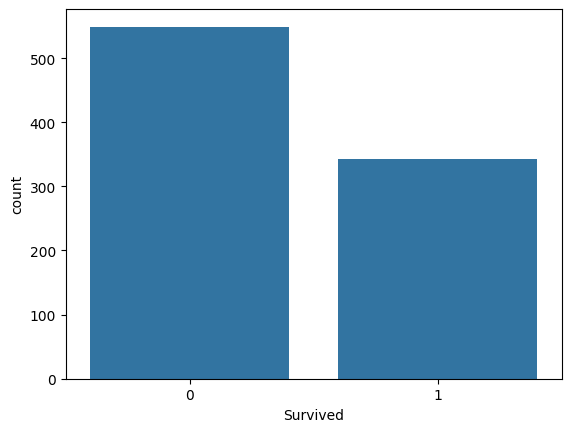

In [15]:
sns.countplot(x='Survived', data=df)
plt.show()

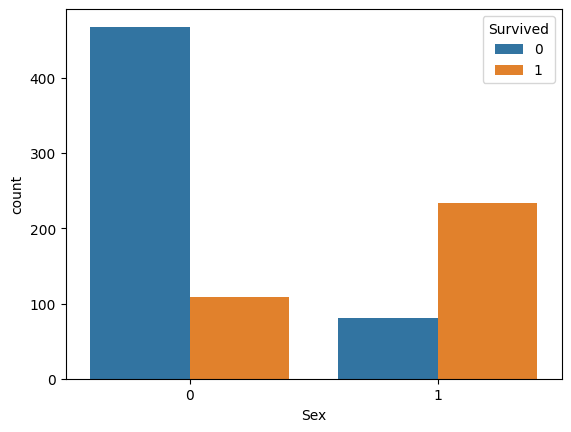

In [16]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

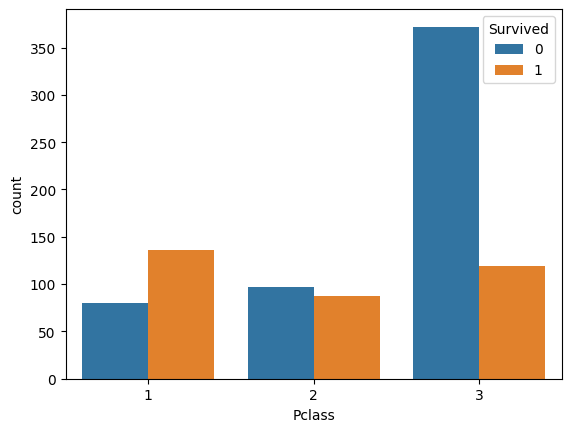

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

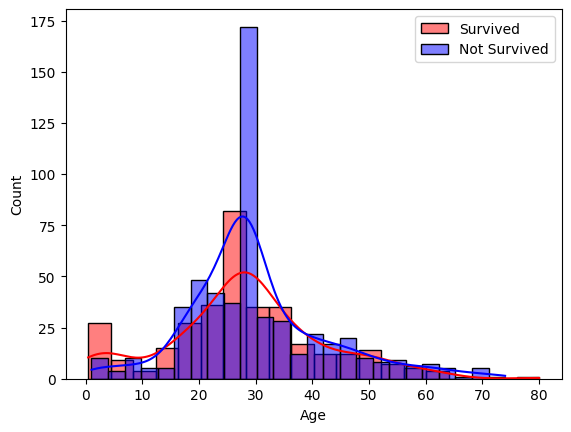

In [20]:
sns.histplot(df[df['Survived']==1]['Age'], kde=True, color='red', label='Survived')
sns.histplot(df[df['Survived']==0]['Age'], kde=True, color='blue', label='Not Survived')
plt.legend()
plt.show()